In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('data/weight-daily.csv', sep = '\t', names = [ 'ds', 'y' ], header = 0)
df.head()

,ds,y
0,2012-11-09,72.40
1,2012-11-10,71.22
2,2012-11-11,71.45
3,2012-11-12,72.30
4,2012-11-13,72.25


In [3]:
m = Prophet()
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Miniconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [4]:
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

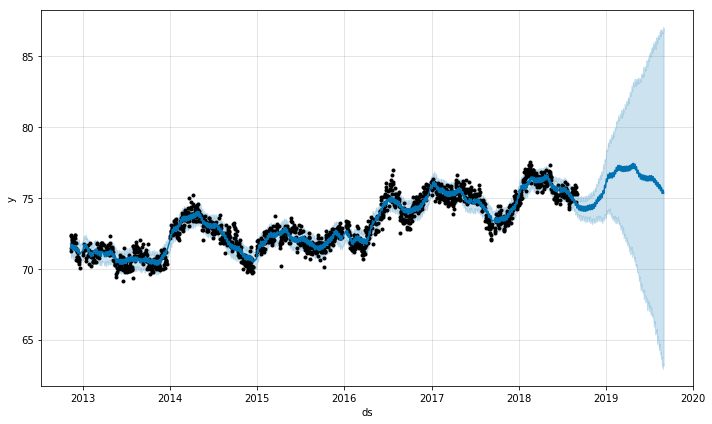

In [5]:
m.plot(forecast);

In [6]:
pd.melt(forecast.loc[forecast['ds'] == '2018-09-21'])

,variable,value
0,ds,2018-09-21 00:00:00
1,trend,75.5932
2,yhat_lower,73.7127
3,yhat_upper,75.0816
4,trend_lower,75.5721
5,trend_upper,75.5995
6,additive_terms,-1.20502
7,additive_terms_lower,-1.20502
8,additive_terms_upper,-1.20502
9,weekly,0.116305


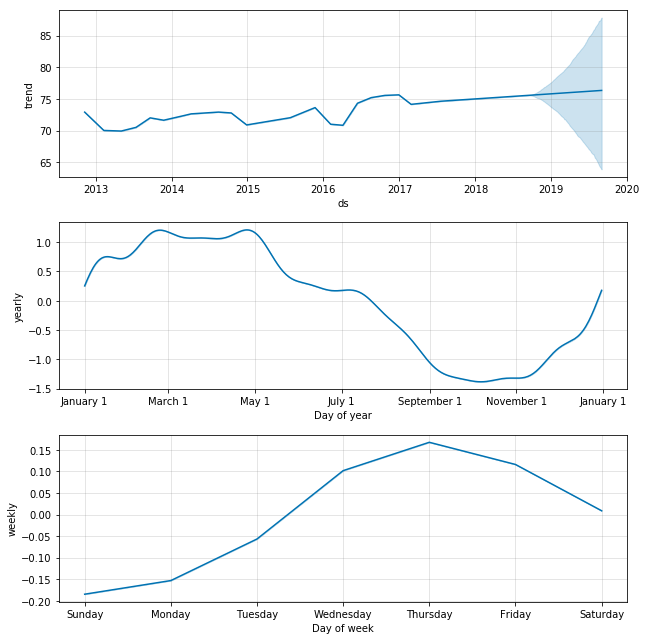

In [7]:
m.plot_components(forecast);